In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')

In [4]:
data.shape

(5656458, 6)

In [5]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [7]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [9]:
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [11]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [13]:
years = data['Year'].unique().tolist()
len(years)

56

In [14]:
print(min(years), "to", max(years))

1960 to 2015


In [19]:
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

stage = data[mask1 & mask2]

In [20]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


<function matplotlib.pyplot.show>

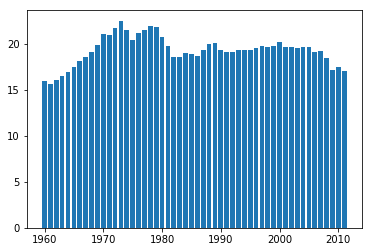

In [22]:
years = stage['Year'].values
co2 = stage['Value'].values

plt.bar(years, co2)
plt.show

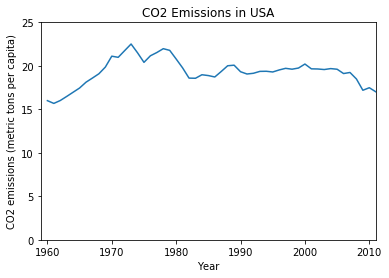

In [25]:
plt.plot(years, co2)

plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

plt.title('CO2 Emissions in USA')

plt.axis([1959,2011,0,25])

plt.show()

In [26]:
hist_data = stage['Value'].values

In [27]:
print(len(hist_data))

52


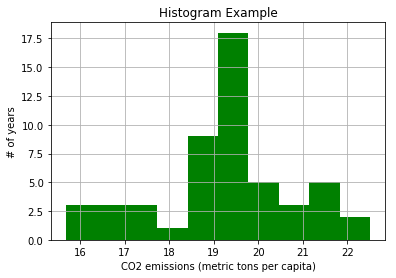

In [34]:
plt.hist(hist_data, 10, normed = False, facecolor = 'green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of years')
plt.title('Histogram Example')
plt.grid(True)

In [40]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [43]:
print(len(co2_2011))

232


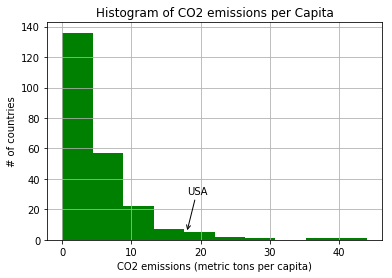

In [60]:
fig, ax = plt.subplots()

ax.annotate("USA",
           xy=(18,5), xycoords = 'data',
           xytext=(18,30), textcoords = 'data',
           arrowprops= dict(arrowstyle = '->',
                            connectionstyle = 'arc3'),
           )



plt.hist(co2_2011['Value'], 10, normed = False, facecolor = 'green')

plt.xlabel(co2_2011['IndicatorName'].iloc[0])
plt.ylabel('# of countries')
plt.title('Histogram of CO2 emissions per Capita')
plt.grid(True)
plt.show()